In [5318]:
import seaborn as sns
import pylab as rcParams
import matplotlib.pyplot as plt
from matplotlib import rc
import matplotlib 
import pandas as pd 
import numpy as np
from tqdm.notebook import tqdm
import pytorch_lightning as pl
from sklearn.preprocessing import MinMaxScaler

import torch
import torch.autograd as autograd
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader


In [5319]:
sns.set(style='whitegrid', palette='muted', font_scale=1.2)

HAPPY_COLORS_PALETTE = ["#01BEFE", "#FFDD00", "#FF7D00", "#FF006D", "#ADFF02", "#8F00FF"]

sns.set_palette(sns.color_palette(HAPPY_COLORS_PALETTE))


tqdm.pandas()

In [5320]:
pl.seed_everything(42)

Seed set to 42


42

In [5321]:
df=pd.read_csv('/home/j/usfq/tesis/StockPredictionModels/Data/Complete.csv')
df

,Date,ticker_symbol,p_sentiment,Open,High,Low,Close,unrate,psr,m2,dspic,pce,reer,ir,ffer,tcs,indpro,ccpi
0,2015-01-02,AAPL,0.857156,27.847500,27.860001,26.837500,27.332500,5.7,8.0,11759.1,13224.7,12036.5,106.11,1.881500,0.114839,1069010.0,102.8479,239.811
1,2015-01-02,AMZN,0.731959,15.629000,15.737500,15.348000,15.426000,5.7,8.0,11759.1,13224.7,12036.5,106.11,1.881500,0.114839,1069010.0,102.8479,239.811
2,2015-01-02,GOOG,0.883473,26.378078,26.490770,26.133251,26.168653,5.7,8.0,11759.1,13224.7,12036.5,106.11,1.881500,0.114839,1069010.0,102.8479,239.811
3,2015-01-02,GOOGL,0.908735,26.629999,26.790001,26.393999,26.477501,5.7,8.0,11759.1,13224.7,12036.5,106.11,1.881500,0.114839,1069010.0,102.8479,239.811
4,2015-01-02,MSFT,0.804051,46.660000,47.419998,46.540001,46.759998,5.7,8.0,11759.1,13224.7,12036.5,106.11,1.881500,0.114839,1069010.0,102.8479,239.811
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7531,2019-12-30,AMZN,0.748412,93.699997,94.199997,92.030998,92.344498,3.6,7.3,15416.2,14844.1,14686.3,116.51,1.862857,1.550968,1458485.0,101.6179,265.651
7532,2019-12-30,GOOG,0.676151,67.500000,67.650002,66.700996,66.806999,3.6,7.3,15416.2,14844.1,14686.3,116.51,1.862857,1.550968,1458485.0,101.6179,265.651
7533,2019-12-30,GOOGL,0.705876,67.840500,67.849998,66.891998,66.985497,3.6,7.3,15416.2,14844.1,14686.3,116.51,1.862857,1.550968,1458485.0,101.6179,265.651
7534,2019-12-30,MSFT,0.762997,158.990005,159.020004,156.729996,157.589996,3.6,7.3,15416.2,14844.1,14686.3,116.51,1.862857,1.550968,1458485.0,101.6179,265.651


In [5322]:
#turn date into unix time
df['Date'] = pd.to_datetime(df['Date'])
df['Date'] = df['Date'].apply(lambda x: x.timestamp())
df
    

,Date,ticker_symbol,p_sentiment,Open,High,Low,Close,unrate,psr,m2,dspic,pce,reer,ir,ffer,tcs,indpro,ccpi
0,1.420157e+09,AAPL,0.857156,27.847500,27.860001,26.837500,27.332500,5.7,8.0,11759.1,13224.7,12036.5,106.11,1.881500,0.114839,1069010.0,102.8479,239.811
1,1.420157e+09,AMZN,0.731959,15.629000,15.737500,15.348000,15.426000,5.7,8.0,11759.1,13224.7,12036.5,106.11,1.881500,0.114839,1069010.0,102.8479,239.811
2,1.420157e+09,GOOG,0.883473,26.378078,26.490770,26.133251,26.168653,5.7,8.0,11759.1,13224.7,12036.5,106.11,1.881500,0.114839,1069010.0,102.8479,239.811
3,1.420157e+09,GOOGL,0.908735,26.629999,26.790001,26.393999,26.477501,5.7,8.0,11759.1,13224.7,12036.5,106.11,1.881500,0.114839,1069010.0,102.8479,239.811
4,1.420157e+09,MSFT,0.804051,46.660000,47.419998,46.540001,46.759998,5.7,8.0,11759.1,13224.7,12036.5,106.11,1.881500,0.114839,1069010.0,102.8479,239.811
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7531,1.577664e+09,AMZN,0.748412,93.699997,94.199997,92.030998,92.344498,3.6,7.3,15416.2,14844.1,14686.3,116.51,1.862857,1.550968,1458485.0,101.6179,265.651
7532,1.577664e+09,GOOG,0.676151,67.500000,67.650002,66.700996,66.806999,3.6,7.3,15416.2,14844.1,14686.3,116.51,1.862857,1.550968,1458485.0,101.6179,265.651
7533,1.577664e+09,GOOGL,0.705876,67.840500,67.849998,66.891998,66.985497,3.6,7.3,15416.2,14844.1,14686.3,116.51,1.862857,1.550968,1458485.0,101.6179,265.651
7534,1.577664e+09,MSFT,0.762997,158.990005,159.020004,156.729996,157.589996,3.6,7.3,15416.2,14844.1,14686.3,116.51,1.862857,1.550968,1458485.0,101.6179,265.651


In [5323]:
#only use date, open, high, low, close
#df = df[['Date', 'ticker_symbol','p_sentiment','unrate','m2','Open', 'High', 'Low', 'Close']]

In [5324]:
#generate new dataframes for each ticker_symbol
df_dict={}
for key in df['ticker_symbol'].unique():
    df_dict[key]=df[df['ticker_symbol']==key]
    df_dict[key]=df_dict[key].drop(columns=['ticker_symbol'])
    df_dict[key]=df_dict[key].sort_values(by=['Date']).reset_index(drop=True)
    df_dict[key]=df_dict[key].drop(columns=['Date'])
    print(key,df_dict[key].shape)
    print(df_dict[key].head(-1))

AAPL (1252, 16)
      p_sentiment       Open       High        Low      Close  unrate  psr  \
0        0.857156  27.847500  27.860001  26.837500  27.332500     5.7  8.0   
1        0.744531  27.072500  27.162500  26.352501  26.562500     5.7  8.0   
2        0.769826  26.635000  26.857500  26.157499  26.565001     5.7  8.0   
3        0.773995  26.799999  27.049999  26.674999  26.937500     5.7  8.0   
4        0.770458  27.307501  28.037500  27.174999  27.972500     5.7  8.0   
...           ...        ...        ...        ...        ...     ...  ...   
1246     0.775477  70.557503  70.662498  69.639999  69.860001     3.6  7.3   
1247     0.759453  70.132500  71.062500  70.092499  71.000000     3.6  7.3   
1248     0.742264  71.172501  71.222504  70.730003  71.067497     3.6  7.3   
1249     0.670220  71.205002  72.495003  71.175003  72.477501     3.6  7.3   
1250     0.760582  72.779999  73.492500  72.029999  72.449997     3.6  7.3   

           m2    dspic      pce    reer        

In [5325]:
ticker='AAPL'

In [5326]:
scaler=MinMaxScaler(feature_range=(-1,1))
scaler=scaler.fit(df_dict[ticker])

In [5327]:
df_dict[ticker]=pd.DataFrame(scaler.transform(df_dict[ticker]), columns=df_dict[ticker].columns, index=df_dict[ticker].index)

In [5328]:
train_size=int(len(df_dict[ticker])*0.9)
train_df, test_df=df_dict[ticker][:train_size], df_dict[ticker][train_size:]
train_df,val_df=train_df[:int(len(train_df)-126)],train_df[int(len(train_df)-126):]
print(val_df.shape, train_df.shape, test_df.shape)


(126, 16) (1000, 16) (126, 16)


In [5329]:
#display last 5 rows
train_df.tail()

,p_sentiment,Open,High,Low,Close,unrate,psr,m2,dspic,pce,reer,ir,ffer,tcs,indpro,ccpi
995,-0.049956,-0.335123,-0.342659,-0.394312,-0.399642,-0.636364,1.0,0.472631,0.799422,0.52019,0.550035,0.61215,0.870751,0.109083,0.899874,0.552786
996,-0.175050,-0.421738,-0.408008,-0.424918,-0.438413,-0.636364,1.0,0.472631,0.799422,0.52019,0.550035,0.61215,0.870751,0.109083,0.899874,0.552786
997,0.007977,-0.420247,-0.351854,-0.423609,-0.335620,-0.636364,1.0,0.472631,0.799422,0.52019,0.550035,0.61215,0.870751,0.109083,0.899874,0.552786
998,0.181035,-0.345267,-0.356401,-0.389882,-0.345760,-0.636364,1.0,0.472631,0.799422,0.52019,0.550035,0.61215,0.870751,0.109083,0.899874,0.552786
999,0.393293,-0.328759,-0.339100,-0.344777,-0.344965,-0.636364,1.0,0.472631,0.799422,0.52019,0.550035,0.61215,0.870751,0.109083,0.899874,0.552786


In [5330]:
def create_sequences(input_data: pd.DataFrame, target_column, sequence_length):
    sequences=[]
    data_size=len(input_data)

    for i in tqdm(range(data_size-sequence_length)):
        sequence=input_data[i:i+sequence_length].copy()
        label_position=i+sequence_length
        label=input_data.iloc[label_position][target_column]
        sequences.append((sequence, label))
    return sequences


In [5331]:
SEQUENCE_LENGTH=20
#consider changing to high and low
train_sequences=create_sequences(train_df, 'Close', SEQUENCE_LENGTH)
test_sequences=create_sequences(test_df, 'Close', SEQUENCE_LENGTH)
val_sequences=create_sequences(val_df, 'Close', SEQUENCE_LENGTH)

  0%|          | 0/980 [00:00<?, ?it/s]

  0%|          | 0/106 [00:00<?, ?it/s]

  0%|          | 0/106 [00:00<?, ?it/s]

PyTorch


In [5332]:
class StockDataset(Dataset):
    def __init__(self, sequences):
        self.sequences=sequences

    def __len__(self):
        return len(self.sequences)

    def __getitem__(self, index):
        sequence, label=self.sequences[index]
        return dict(
            sequence=torch.Tensor(sequence.to_numpy()),
            label=torch.Tensor([label]).float()
        )

In [5333]:
class StockDataModule(pl.LightningDataModule):
    def __init__(self, train_sequences, test_sequences, val_sequences, batch_size=128):
        super().__init__()
        self.train_sequences=train_sequences
        self.test_sequences=test_sequences
        self.val_sequences=val_sequences
        self.batch_size=batch_size

    def setup(self,stage=None):
        self.train_dataset=StockDataset(self.train_sequences)
        self.test_dataset=StockDataset(self.test_sequences)
        self.val_dataset=StockDataset(self.val_sequences)

    def train_dataloader(self): #considerar el shuffle
        return DataLoader(self.train_dataset, batch_size=self.batch_size, shuffle=True,num_workers=2)

    def test_dataloader(self):
        return DataLoader(self.test_dataset, batch_size=self.batch_size, shuffle=False,num_workers=1)

    def val_dataloader(self):
        return DataLoader(self.val_dataset, batch_size=self.batch_size, shuffle=False,num_workers=1)

In [5334]:
N_EPOCHS=1024
BATCH_SIZE=128

data_module=StockDataModule(train_sequences, test_sequences, val_sequences, batch_size=BATCH_SIZE)
data_module.setup()

In [5335]:
train_dataset=StockDataset(train_sequences)

In [5336]:
for item in train_dataset:
    print(item['sequence'].shape)
    print(item['label'].shape)
    print(item['label'])
    break

torch.Size([20, 16])
torch.Size([1])
tensor([-0.7188])


#MODEL

In [5337]:
#delete checkpoints and lightning_logs
import os
import shutil
shutil.rmtree('/home/j/usfq/tesis/StockPredictionModels/Models/LSTM/lightning_logs')
shutil.rmtree('/home/j/usfq/tesis/StockPredictionModels/Models/LSTM/checkpoints')


In [5338]:
class LSTM_Model(nn.Module):
    def __init__(self, n_features, n_hidden=12, n_layers=1, dropout=0.1):
        super().__init__()
        self.n_hidden = n_hidden
        self.n_layers = n_layers
        
        #self.lstm = nn.LSTM(input_size=n_features, hidden_size=n_hidden, num_layers=n_layers, 
         #                   batch_first=True, dropout=dropout if n_layers > 1 else 0)
          # GRU can be an alternative for LSTM
        self.lstm = nn.GRU(input_size=n_features, hidden_size=n_hidden, num_layers=n_layers, 
                            batch_first=True, dropout=dropout if n_layers > 1 else 0)

        # Weight initialization for LSTM
        for name, param in self.lstm.named_parameters():
            if 'weight_ih' in name:
                torch.nn.init.xavier_uniform_(param.data)
            elif 'weight_hh' in name:
                torch.nn.init.orthogonal_(param.data)
                
        self.linear = nn.Linear(in_features=n_hidden, out_features=1)

        # GRU can be an alternative for LSTM
        # self.lstm = nn.GRU(input_size=n_features, hidden_size=n_hidden, num_layers=n_layers, 
        #                    batch_first=True, dropout=dropout if n_layers > 1 else 0)


    def forward(self, x):
        self.lstm.flatten_parameters()
        output, hidden = self.lstm(x)
        return self.linear(output[:, -1, :])  # taking the last timestep's output


In [5339]:
class StockLSTM(pl.LightningModule):
    def __init__(self, n_features, l1_strength=1e-5, l2_strength=1e-4):
        super().__init__()
        self.criterion = nn.MSELoss()
        self.model = LSTM_Model(n_features)
        self.save_hyperparameters()
        
        # L1 and L2 regularization strengths
        self.l1_strength = l1_strength
        self.l2_strength = l2_strength

    def l1_regularization(self, model):
        return sum(torch.norm(param, 1) for param in model.parameters())


    def l2_regularization(self, model):
        return sum(torch.norm(param, 2) for param in model.parameters())

    
    def forward(self, x, labels=None):
        output = self.model(x)
        loss = 0
        if labels is not None:
            loss = self.criterion(output, labels.unsqueeze(dim=1))
            
            # Apply L1 and L2 regularization
            loss += self.l1_strength * self.l1_regularization(self.model)
            loss += self.l2_strength * self.l2_regularization(self.model)
            
        return loss, output

    def training_step(self, batch, batch_idx):
        x, y = batch['sequence'], batch['label']
        loss, outputs = self(x, y)
        self.log('train_loss', loss, prog_bar=True, logger=True)
        return loss

    def on_after_backward(self):
        if self.trainer.global_step % self.trainer.log_every_n_steps == 0:
            for name, params in self.named_parameters():
                self.logger.experiment.add_histogram(name, params.grad, self.trainer.global_step)

    def configure_optimizers(self):
        optimizer = optim.Adam(self.parameters(), lr=0.001)
        scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, 'min', patience=5, factor=0.5)
        return {'optimizer': optimizer, 'lr_scheduler': scheduler, 'monitor': 'val_loss'}

    def validation_step(self, batch, batch_idx):
        x, y = batch['sequence'], batch['label']
        loss, outputs = self(x, y)
        self.log('val_loss', loss, prog_bar=True, logger=True)
        return loss

    def test_step(self, batch, batch_idx):
        x, y = batch['sequence'], batch['label']
        loss, outputs = self(x, y)
        self.log('test_loss', loss, prog_bar=True, logger=True)
        return loss

    def predict(self, x, y):
        y_hat = self(x).squeeze()
        loss = self.criterion(y_hat, y)
        return y_hat, loss

    def save_model(self, path):
        torch.save(self.state_dict(), path)

    def load_model(self, path):
        self.load_state_dict(torch.load(path))

In [5340]:
train_df.shape

(1000, 16)

In [5341]:
model = StockLSTM(n_features=train_df.shape[1])

In [5342]:
for item in data_module.train_dataloader():
    print(item['sequence'].shape)
    print(item['label'].shape)
    #print(item['label'])
    break

torch.Size([128, 20, 16])
torch.Size([128, 1])


In [5343]:
checkpoint_callback=pl.callbacks.ModelCheckpoint(
    dirpath='checkpoints',
    filename='best-checkpoint',
    save_top_k=1,
    verbose=True,
    monitor='val_loss',
    mode='min'
)

logger=pl.loggers.TensorBoardLogger('lightning_logs/', name='stock-lstm')

early_stopping_callback=pl.callbacks.EarlyStopping(monitor='val_loss', patience=3)

trainer = pl.Trainer(
    logger=logger,
    callbacks=[checkpoint_callback,early_stopping_callback],
    max_epochs=N_EPOCHS,
    
)


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


In [5344]:
trainer.fit(model, data_module)

Missing logger folder: lightning_logs/stock-lstm
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name      | Type       | Params
-----------------------------------------
0 | criterion | MSELoss    | 0     
1 | model     | LSTM_Model | 1.1 K 
-----------------------------------------
1.1 K     Trainable params
0         Non-trainable params
1.1 K     Total params
0.004     Total estimated model params size (MB)


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

/home/j/miniconda3/envs/gen/lib/python3.9/site-packages/pytorch_lightning/trainer/connectors/data_connector.py:441: The 'val_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=23` in the `DataLoader` to improve performance.
/home/j/miniconda3/envs/gen/lib/python3.9/site-packages/torch/nn/modules/loss.py:536: UserWarning: Using a target size (torch.Size([106, 1, 1])) that is different to the input size (torch.Size([106, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
/home/j/miniconda3/envs/gen/lib/python3.9/site-packages/pytorch_lightning/loops/fit_loop.py:293: The number of training batches (8) is smaller than the logging interval Trainer(log_every_n_steps=50). Set a lower value for log_every_n_steps if you want to see logs for the training epoch.


Training: |          | 0/? [00:00<?, ?it/s]

/home/j/miniconda3/envs/gen/lib/python3.9/site-packages/torch/nn/modules/loss.py:536: UserWarning: Using a target size (torch.Size([128, 1, 1])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
/home/j/miniconda3/envs/gen/lib/python3.9/site-packages/torch/nn/modules/loss.py:536: UserWarning: Using a target size (torch.Size([84, 1, 1])) that is different to the input size (torch.Size([84, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 0, global step 8: 'val_loss' reached 0.06397 (best 0.06397), saving model to '/home/j/usfq/tesis/StockPredictionModels/Models/LSTM/checkpoints/best-checkpoint.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 1, global step 16: 'val_loss' reached 0.05332 (best 0.05332), saving model to '/home/j/usfq/tesis/StockPredictionModels/Models/LSTM/checkpoints/best-checkpoint.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 2, global step 24: 'val_loss' reached 0.03859 (best 0.03859), saving model to '/home/j/usfq/tesis/StockPredictionModels/Models/LSTM/checkpoints/best-checkpoint.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 3, global step 32: 'val_loss' reached 0.02649 (best 0.02649), saving model to '/home/j/usfq/tesis/StockPredictionModels/Models/LSTM/checkpoints/best-checkpoint.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 4, global step 40: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 5, global step 48: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 6, global step 56: 'val_loss' was not in top 1


In [5345]:
trained_model=StockLSTM.load_from_checkpoint('checkpoints/best-checkpoint.ckpt', n_features=test_df.shape[1])

In [5346]:
trained_model.freeze()

In [5347]:
test_dataset=StockDataset(test_sequences)

predictions = []
labels=[]

trained_model.to('cpu') # move the model to the CPU

for item in tqdm(test_dataset):
    x=item['sequence']
    y=item['label']
   
    _, output= trained_model(x.unsqueeze(dim=0)) # send input to the device
    predictions.append(output.item())
    labels.append(y.item())

  0%|          | 0/106 [00:00<?, ?it/s]

In [5348]:
len(predictions),len(test_dataset)

(106, 106)

In [5349]:
#turn predictions and labels into numpy arrays of shape 112,16
predictions=np.array(predictions)
labels=np.array(labels)
print(predictions.shape,labels.shape)

#reshape predictions and labels to 2d arrays
predictions=predictions.reshape(-1,1)
labels=labels.reshape(-1,1)
print(predictions.shape,labels.shape)

predictions= np.repeat(predictions, repeats=16, axis=1)
labels= np.repeat(labels, repeats=16, axis=1)
print(predictions.shape,labels.shape)

(106,) (106,)
(106, 1) (106, 1)
(106, 16) (106, 16)


In [5350]:
#unnormalize predictions and labels with sclaer for only the Close column
predictions_list=scaler.inverse_transform(predictions)
labels_list=scaler.inverse_transform(labels)


In [5351]:
#show shape of predictions and labels
print(predictions_list.shape,labels_list.shape)

(106, 16) (106, 16)


In [5352]:
predictions_list=predictions_list[:,4]
labels_list=labels_list[:,4]
print(predictions_list.shape,labels_list.shape)

(106,) (106,)


In [5353]:
test_sequences_data= val_df.iloc[SEQUENCE_LENGTH:].copy()
len(test_sequences_data),len(test_sequences)

(106, 106)

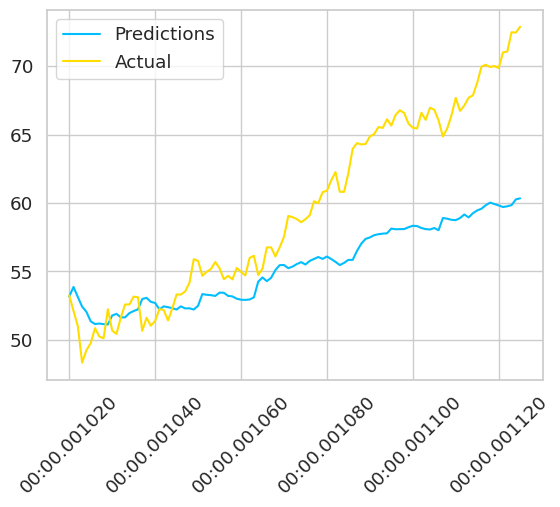

In [5354]:
dates=matplotlib.dates.date2num(test_sequences_data.index)
plt.plot_date(dates, predictions_list, "-", label="Predictions")
plt.plot_date(dates, labels_list, "-", label="Actual")
plt.xticks(rotation=45)
plt.legend()
plt.show()

In [5355]:
%load_ext tensorboard
%tensorboard --logdir ./lightning_logs

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


Reusing TensorBoard on port 6006 (pid 500790), started 1:17:32 ago. (Use '!kill 500790' to kill it.)